In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('gdrive/My Drive/train.csv')

In [ ]:
df.head()

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,CATEGORY,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE
0,952289,Lipstick queen reserved maiwu,4,Beauty/Makeup/Lips,NaN,0,Lipstick Queen Jean Queen and medieval lipstic...,20.0
1,121903,Garbage Pail Kids blu ray,3,Electronics/Media/Blu-Ray,NaN,1,26Plays great. Tested. Watched once. No scratc...,15.0
2,280534,green floam/slime,1,Kids/Toys/Arts & Crafts,NaN,0,"-6 oz, dragon fruit scented - KEEP OUT OF REAC...",8.0
3,787961,Wallet beige monogram,1,Women/Women's Accessories/Wallets,NaN,0,Wallet brand new never used,31.0
4,479292,Triangle Bike Or Body Blue Light,3,Sports & Outdoors/Outdoors/Other,NaN,0,"Triangle Bike Or Body Blue Light, steady or fl...",8.0


In [ ]:
df.isnull().sum()

PRODUCT_ID                    0
PRODUCT_NAME                  0
PRODUCT_CONDITION             0
CATEGORY                   5416
PRODUCT_BRAND            537885
SHIPPING_AVAILABILITY         0
PRODUCT_DESCRIPTION           3
PRODUCT_PRICE                 0
dtype: int64

In [ ]:
df.drop(axis="columns", labels="PRODUCT_ID", inplace=True)

In [ ]:
null_index = df.index[df['PRODUCT_DESCRIPTION'].isnull()]

In [ ]:
df.drop(axis="rows", index=null_index, inplace=True)

In [ ]:
df.isnull().sum()

PRODUCT_NAME                  0
PRODUCT_CONDITION             0
CATEGORY                   5416
PRODUCT_BRAND            537883
SHIPPING_AVAILABILITY         0
PRODUCT_DESCRIPTION           0
PRODUCT_PRICE                 0
dtype: int64

In [ ]:
df.describe()

,PRODUCT_CONDITION,SHIPPING_AVAILABILITY,PRODUCT_PRICE
count,1.260151e+06,1.260151e+06,1.260151e+06
mean,1.907478e+00,4.472393e-01,2.672049e+01
std,9.032447e-01,4.972087e-01,3.855898e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+01
50%,2.000000e+00,0.000000e+00,1.700000e+01
75%,3.000000e+00,1.000000e+00,2.900000e+01
max,5.000000e+00,1.000000e+00,2.009000e+03


In [ ]:
free_products = df.index[df['PRODUCT_PRICE']==0]

In [ ]:
df.drop(axis="rows", index=free_products, inplace=True)

In [ ]:
df[(df['PRODUCT_DESCRIPTION'] == 'No description yet')]['PRODUCT_PRICE'].describe()

count    70171.000000
mean        21.980697
std         29.244397
min          3.000000
25%         10.000000
50%         15.000000
75%         25.000000
max       1400.000000
Name: PRODUCT_PRICE, dtype: float64

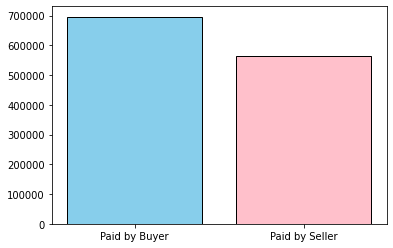

In [ ]:
shipping = ['Paid by Buyer', 'Paid by Seller']
counts = [(df['SHIPPING_AVAILABILITY']==0).sum(),(df['SHIPPING_AVAILABILITY']==1).sum()]
plt.bar(shipping,counts,color=['skyblue','pink'],edgecolor='black')
plt.show()

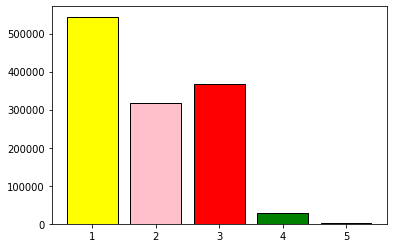

In [ ]:
cat = ['1','2','3','4','5']
counts = [(df['PRODUCT_CONDITION']==1).sum(),(df['PRODUCT_CONDITION']==2).sum(),(df['PRODUCT_CONDITION']==3).sum(),(df['PRODUCT_CONDITION']==4).sum(),(df['PRODUCT_CONDITION']==5).sum()]
plt.bar(cat,counts,color=['yellow','pink','red','green','blue'],edgecolor='black')
plt.title("")
plt.show()

In [ ]:
(df['CATEGORY'].str.count('/')).max()

4.0

The above Operation shows 'The maximum occurence of / in column CATEGORY'.

Thus Maximum number of Categories can be 5.

In [ ]:
df[['CATEGORY_1','CATEGORY_2','CATEGORY_3','CATEGORY_4','CATEGORY_5']]=df.CATEGORY.str.split("/",expand=True).loc[:,:4]

In [ ]:
df.head()

,PRODUCT_NAME,PRODUCT_CONDITION,CATEGORY,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,CATEGORY_5
0,Lipstick queen reserved maiwu,4,Beauty/Makeup/Lips,NaN,0,Lipstick Queen Jean Queen and medieval lipstic...,20.0,Beauty,Makeup,Lips,None,None
1,Garbage Pail Kids blu ray,3,Electronics/Media/Blu-Ray,NaN,1,26Plays great. Tested. Watched once. No scratc...,15.0,Electronics,Media,Blu-Ray,None,None
2,green floam/slime,1,Kids/Toys/Arts & Crafts,NaN,0,"-6 oz, dragon fruit scented - KEEP OUT OF REAC...",8.0,Kids,Toys,Arts & Crafts,None,None
3,Wallet beige monogram,1,Women/Women's Accessories/Wallets,NaN,0,Wallet brand new never used,31.0,Women,Women's Accessories,Wallets,None,None
4,Triangle Bike Or Body Blue Light,3,Sports & Outdoors/Outdoors/Other,NaN,0,"Triangle Bike Or Body Blue Light, steady or fl...",8.0,Sports & Outdoors,Outdoors,Other,None,None


In [ ]:
(df['CATEGORY_4'].isna()).sum()

1255723

In [ ]:
(df['CATEGORY_5'].isna()).sum()

1256846

In [ ]:
(df['CATEGORY_3'].isna()).sum()

5407

In [ ]:
df.shape

(1259411, 12)

In [ ]:
df.drop(axis='columns',labels=['CATEGORY','CATEGORY_4','CATEGORY_5'],inplace=True)

In [ ]:
df.head()

,PRODUCT_NAME,PRODUCT_CONDITION,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE,CATEGORY_1,CATEGORY_2,CATEGORY_3
0,Lipstick queen reserved maiwu,4,NaN,0,Lipstick Queen Jean Queen and medieval lipstic...,20.0,Beauty,Makeup,Lips
1,Garbage Pail Kids blu ray,3,NaN,1,26Plays great. Tested. Watched once. No scratc...,15.0,Electronics,Media,Blu-Ray
2,green floam/slime,1,NaN,0,"-6 oz, dragon fruit scented - KEEP OUT OF REAC...",8.0,Kids,Toys,Arts & Crafts
3,Wallet beige monogram,1,NaN,0,Wallet brand new never used,31.0,Women,Women's Accessories,Wallets
4,Triangle Bike Or Body Blue Light,3,NaN,0,"Triangle Bike Or Body Blue Light, steady or fl...",8.0,Sports & Outdoors,Outdoors,Other


In [ ]:
df.isna().sum()

PRODUCT_NAME                  0
PRODUCT_CONDITION             0
PRODUCT_BRAND            537586
SHIPPING_AVAILABILITY         0
PRODUCT_DESCRIPTION           0
PRODUCT_PRICE                 0
CATEGORY_1                 5407
CATEGORY_2                 5407
CATEGORY_3                 5407
dtype: int64

As of now we are removing null Categories. Let us know if there is any better solution.

By removing these NULL Categories number of Brands reduced by 17.

One of the solution we came across, replaced the Null values by "Not Available" making it a new Category in itself

In [ ]:
df.drop(axis='rows', index= df.index[df['CATEGORY_1'].isna()], inplace=True)

In [ ]:
category=df['CATEGORY_1'].unique()
category.shape

(10,)

In [ ]:
catcounts=[0]*category.shape[0]
for i in range(category.shape[0]):
  catcounts[i] = (df['CATEGORY_1']==category[i]).sum()

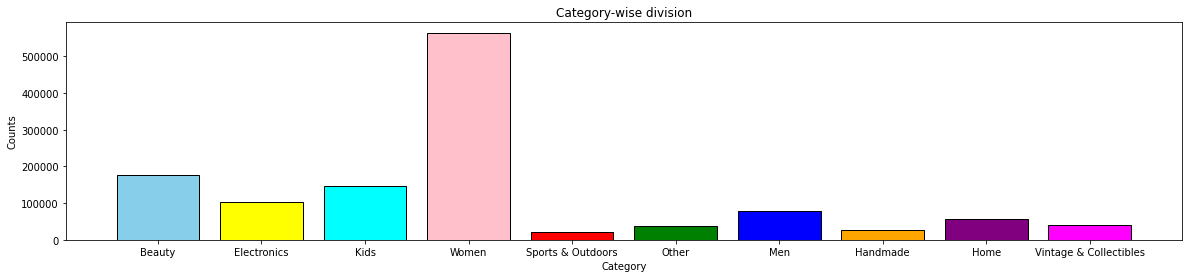

In [ ]:
# category=category.tolist()
f = plt.figure()
f.set_figwidth(20)
# f.set_figheight(1)
plt.bar(category,catcounts,edgecolor='black',color=['skyblue','yellow','aqua','pink','red','green','blue','orange','purple','magenta'])
plt.title("Category-wise division")
plt.xlabel("Category")
plt.ylabel("Counts")
plt.show()


In [ ]:
category2=df['CATEGORY_2'].unique()
category2.shape

(113,)

In [ ]:
category3=df['CATEGORY_3'].unique()
category3.shape

(863,)

In [ ]:
brands = df['PRODUCT_BRAND'].unique().tolist()

In [ ]:
null_idx = df.index[df['PRODUCT_BRAND'].isna()]

In [ ]:
null_idx

Int64Index([      0,       1,       2,       3,       4,       8,      10,
                 11,      12,      15,
            ...
            1260136, 1260137, 1260139, 1260140, 1260141, 1260144, 1260145,
            1260150, 1260151, 1260153],
           dtype='int64', length=534629)

In [ ]:
c=0
for i in null_idx:
  if(c%1000==0):
    print(c) 
  flag = 0
  c=c+1
  for name in brands[1:100]:
    if(name in (df['PRODUCT_DESCRIPTION'][i])):
      df['PRODUCT_BRAND']=name
      flag=1
      break
  if(flag==1):
    break
  for name in brands[1:]:
    if(name in (df['PRODUCT_NAME'][i])):
      df['PRODUCT_BRAND']=name
      break

0


In [ ]:
for i in null_idx:
  print(df['PRODUCT_BRAND'][i])